## Import the necessary Libraries

In [1]:
import numpy as np 
from numpy import unique, argmax
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist 

## Loading the MNIST dataset
###### In this dataset, 60,000 images in the train set and 10,000 images in the test set and shape of the images 28 X 28

In [2]:
(xtrain, ytrain_label), (xtest, ytest_label) = mnist.load_data()

#### Display the dimension of the dataset

In [3]:
print(xtrain.shape, ytrain_label.shape)

(60000, 28, 28) (60000,)


In [4]:
print(xtest.shape , ytest_label.shape)

(10000, 28, 28) (10000,)


## Exploratory Data Analysis

##### Display the distribution of labels in the training set

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


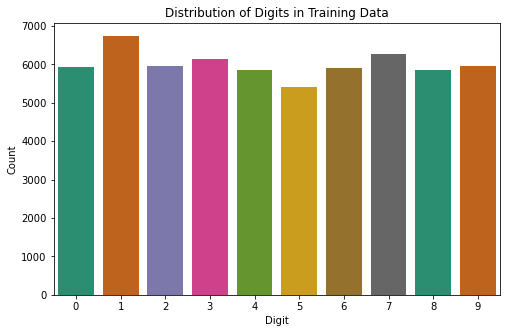

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(ytrain_label, palette='Dark2')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Data')
plt.show()

Count the digits label of training dataset

##### Count the training set images with label index 

In [6]:
# assume ytrain_label is a numpy array and its contain all labels
unique_label, label_count = np.unique(ytrain_label, return_counts=True)

# display the count of each unique label
for label, count in zip(unique_label, label_count):
    print(f"Label {label}: {count} images")

Label 0: 5923 images
Label 1: 6742 images
Label 2: 5958 images
Label 3: 6131 images
Label 4: 5842 images
Label 5: 5421 images
Label 6: 5918 images
Label 7: 6265 images
Label 8: 5851 images
Label 9: 5949 images


##### Ploting the images with labels

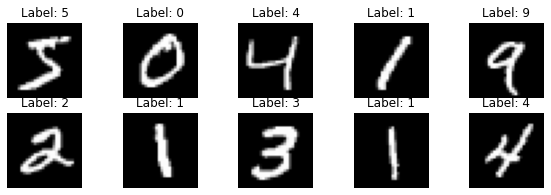

In [7]:
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f"Label: {ytrain_label[i]}")
    plt.axis('off')
plt.show()

Test images doesn't have labels. We need to create a model to predict them.

### Preprocessing and Visualization  the dataset

##### Reshape the training  and test dataset
Let's reshape the datasets since the all images are greyscaled.

In [8]:
# reshape training the data
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))

# reshape testing the data
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], xtest.shape[2], 1))

In this dataset all images are greyscaled that's why set the color channel one in the reshape and to use this reshaping operation on data with a CNN, we reshape it into a 4D array, where the extra dimension is used to represent the number of images in the dataset.

##### Display the new dimension

In [9]:
print(xtrain.shape, ytrain_label.shape)
print(xtest.shape , ytest_label.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


##### Normalizing the pixel values of images 

In [10]:
# normalize the pixel values of training images
xtrain = xtrain.astype('float32')/255.0

# normalize the pixel values of testing images
xtest = xtest.astype('float32')/255.0

Normalization for scaling the image pixels will help improve the model's performance because the value will range from 0 to 1 instead of 0 to 255. 

##### Plotting images with label of dataset 
Let's plot the first 20 images with labels for better visualization

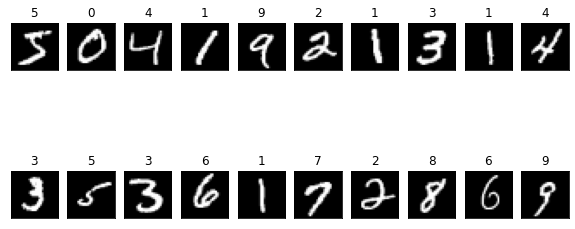

In [11]:
fig = plt.figure(figsize = (10,5))
for i in range(20):
    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(xtrain[i]), cmap='gray')
    ax.set_title(ytrain_label[i])

##### Determine the shape of a each input image

In [12]:
INPUT_SHAPE = xtrain.shape[1:]
INPUT_SHAPE

(28, 28, 1)

In [13]:
# One-hot encode the labels
# ytrain_label = to_categorical(ytrain_label)
# ytest_label = to_categorical(ytest_label)

## Build the CNN Model

##### CNN Model Archictecture 

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

###### Explanation and Configuration the CNN Model Architecture:
1. Adding the first Conv2D layer with 32 filters, a 3x3 kernel size (filter size), input shape (28,28,1) and ReLU activation is used for capturing 32 different features from the input image. The choice of 32 filters is common for the first layer.
2. MaxPool2D layers with a 2x2 pool size are added after each convolutional layer to reduce spatial dimensions and help the model focus on the most important features.
3. Add to the second Conv2D layer with 48 filters and a 3x3 kernel size further extracts more complex features from the previous layer's output.
4. Again add to MaxPool2D layers with a 2x2 pool size are used to each convolutional layer to reduce spatial dimensions and help the model focus on the most important features.
5. Adding the Dropout layer with a rate of 0.5 is introduced after the pooling layers to reduce overfitting by randomly dropping 50% of the neurons during training.
6. Add to the Flatten layer is used to convert the 2D output of the previous layer into a 1D array, preparing it for the fully connected layers.
7. Adding Fully Connected Dense layer with 500 units and ReLU activation is added for feature extraction. And also add the final Dense layer with 10 units (for 10 classes) and softmax activation is added for classification.

##### display the summary of this model for better understanding

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

##### compiling this model 

In [16]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'] )

###### Explanation the Model Compilation:
1. Optimizer: Adam optimizer is chosen for its efficiency and adaptability to different kinds of data and models. 
2. Loss Function: 'sparse_categorical_crossentropy' is chosen as the loss function. This is suitable for multi-class classification problems with integer labels (as opposed to one-hot encoded labels).
3. Metrics: 'accuracy' is chosen as the evaluation metric to monitor the classification accuracy during training.

##### Training the model on training data

In [17]:
model_history = model.fit(xtrain, ytrain_label, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 56s - loss: 0.2527 - accuracy: 0.9237 - val_loss: 0.0604 - val_accuracy: 0.9825 - 56s/epoch - 132ms/step
Epoch 2/10
422/422 - 73s - loss: 0.0830 - accuracy: 0.9734 - val_loss: 0.0558 - val_accuracy: 0.9837 - 73s/epoch - 172ms/step
Epoch 3/10
422/422 - 52s - loss: 0.0608 - accuracy: 0.9806 - val_loss: 0.0364 - val_accuracy: 0.9907 - 52s/epoch - 123ms/step
Epoch 4/10
422/422 - 50s - loss: 0.0494 - accuracy: 0.9840 - val_loss: 0.0334 - val_accuracy: 0.9913 - 50s/epoch - 119ms/step
Epoch 5/10
422/422 - 44s - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0314 - val_accuracy: 0.9925 - 44s/epoch - 105ms/step
Epoch 6/10
422/422 - 46s - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9918 - 46s/epoch - 110ms/step
Epoch 7/10
422/422 - 45s - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0380 - val_accuracy: 0.9897 - 45s/epoch - 106ms/step
Epoch 8/10
422/422 - 46s - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0293 - val_accuracy: 0.9918 - 46s/epoch - 108

###### Explanation the model training process:
1. Epochs: The model is trained for 10 epochs (epochs means number of iteration). The number of epochs is a hyperparameter that defines the number of times the model will be trained on the entire training dataset.
2. Batch Size: A batch size of 128 is chosen. This means that the model will update its weights after every 128 samples. A smaller batch size can lead to more frequent updates but can be computationally intensive.
3. Validation Split: A validation split of 0.1 is used, meaning 10% of the training data is set aside as validation data. This helps monitor the model's performance on unseen data during training and helps in detecting overfitting.

##### Visualization of the Accuray and Loss graph of Training and Validation 
Visualize the training and validation accuracy as well as the training and validation loss during the training of a neural network.

In [21]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

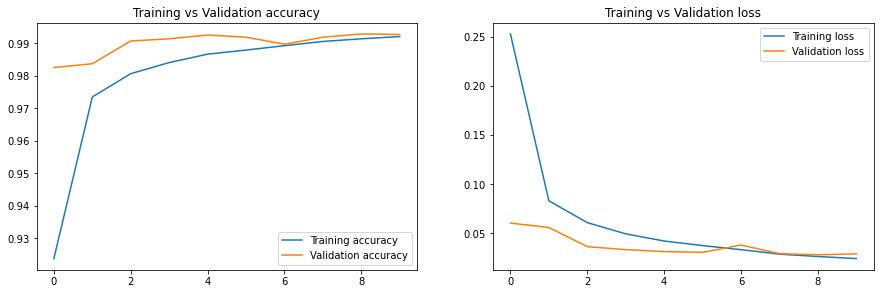

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs Validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs Validation loss")

plt.show()

In the above code segment, we see the generating a single figure with two subplots. 
1. The first subplot displays the training and validation accuracy over epochs.
2. The second subplot displays the training and validation loss over epochs. 

These visualizations are helpful for understanding the model's training progress and identifying overfitting or underfitting.

#### Evaluate the Model

In [27]:
model.evaluate(xtest, ytest_label, verbose = False)

[0.020642120391130447, 0.9926999807357788]

### Now Predict the Image Label

##### let's display the images which want to predict label

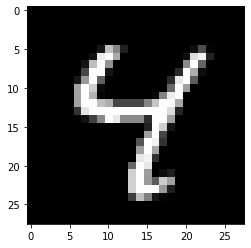

In [30]:
input_image = xtest[6]
plt.imshow(np.squeeze(input_image), cmap='gray')
plt.show()

In [31]:
input_image = input_image.reshape(1, input_image.shape[0], input_image.shape[1], input_image.shape[2])
pred = model.predict(input_image)
print('Predicted Label: {}'.format(argmax(pred)))

1/1 [==============================] - 0s 36ms/step
Predicted Label: 4
